# Laboratorio 6: Selección de Atributos

Integrantes: **José Canales y Sebastián Salas** ambos sección 1

# Instrucciones


1. Trabajen en equipos de dos personas.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. El formato de entrega para esta actividad es un archivo html, **no se revisarán entregas en otro formato**. Genere un archivo HTML y súbalo a U-Cursos. Basta con que uno de los integrantes haga la entrega. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

# Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [2]:
X.shape

(1797, 64)

In [3]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

# Análisis Exploratorio

**P0** - Para cada parte de esta sección, responda adicionalmente las siguientes preguntas:
1. ¿Qué puede decir de los datos a partir de estos reusultados?
2. ¿Considera que hay que remover alguna columna?

Si la respuesta de la segunda pregunta es afirmativa, elimine esas columnas. Guarde cada modificación que haga sobre los datos en una nueva variable `X2` y mantenga `X` sin modificar.

**P1** - Determine la proporción de los datos que es igual a $0$ y si existen columnas que sólo contienen este valor.

In [4]:
df_X = pd.DataFrame(X)

proporcion = (df_X == 0).sum().sum() / df_X.size * 100
print(f"Proporción de ceros en X: {int(proporcion)}% \n")

columnas_cero = (df_X == 0).all()
indices = columnas_cero[columnas_cero].index
print(f"Columnas solo con ceros: {list(indices)}")

Proporción de ceros en X: 48% 

Columnas solo con ceros: [0, 32, 39]



1. ¿Qué puede decir de los datos a partir de estos reusultados?
**Respuesta:** podemos decir que un alto porcentaje de los datos es nulo, cercano a la mitad.
2. ¿Considera que hay que remover alguna columna?
**Respuesta:** sí, podemos eliminar las columnas con cero ya que no aportan información.

In [5]:
df_X_clean = df_X.drop(columns=indices)

X2 = df_X_clean.values

df_X = pd.DataFrame(X2)
columnas_cero = (df_X == 0).all()
indices = columnas_cero[columnas_cero].index
print(f"Columnas solo con ceros: {list(indices)}")

Columnas solo con ceros: []


**P2** - Visualize la matriz de correlación para `X2`. Dada la cantidad de columnas, puede ser útil visualizar también la matriz son subconjuntos más pequeños para un análisis más preciso.

<Figure size 1000x800 with 0 Axes>

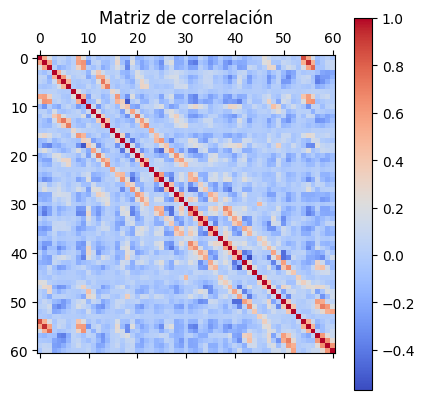

Columnas con alta correlación: [55]


In [29]:
corr_matrix = df_X.corr()

plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.title("Matriz de correlación")
plt.show()


corr_matrix = corr_matrix.abs()
threshold = 0.9
cols_to_drop = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            if colname not in cols_to_drop:
                cols_to_drop.append(colname)

print(f"Columnas con alta correlación: {cols_to_drop}")

**Respuesta:**

In [7]:
X2 = ...

**P3** - Calcule la varianza de los datos.

**Respuesta:**

In [8]:
from sklearn.feature_selection import VarianceThreshold



X2 = ...

# Selección de Atributos

In [9]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

**P4** - Selecciones las 30 mejores columnas según el criterio de información mutua.

In [11]:

X3_train = ...
X3_test = ...

**P5** - Seleccione las columnas más útiles según los resultados de un árbol de clasificación. Seleccione un máximo de 30.

In [12]:
from sklearn.tree import DecisionTreeClassifier


X4_train = ...
X4_test = ...

# Clasificación

**P6** - Entrene y evalue un clasificador SVC para el dataset sin reducir y cada una de las reducciones hechas en las preguntas anteriores. Para cada caso mida el tiempo de entrenamiento y grafique la matriz de confusión, luego compare y comente los resultados.

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import timeit

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=0)

def plot_confusion_matrix(true_label, pred_label):
    mat = confusion_matrix(true_label, pred_label)

    fig, ax = plt.subplots()

    ax = sns.heatmap(mat, annot=True, cmap='Reds')
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

    plt.show()

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(Ellipsis, dtype=object)` instead.